# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [6]:
# Combine the data into a single DataFrame
df=study_results.merge(mouse_metadata, on="Mouse ID")

In [7]:
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [11]:
# Checking the number of mice.
num_mice=df["Mouse ID"].nunique()
num_mice

249

In [13]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate=df.loc[df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data=df.loc[df["Mouse ID"] == duplicate[0]]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean=df.drop(duplicate_mouse_data.index)
df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [18]:
# Checking the number of mice in the clean DataFrame.
df_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [19]:
# Group by Drug Regimen
drug_regimen = df_clean.groupby("Drug Regimen")

In [20]:
# Find the mean
mean = drug_regimen["Tumor Volume (mm3)"].mean()

In [21]:
# Find the median
median = drug_regimen["Tumor Volume (mm3)"].median()

In [22]:
# Find the variance
variance = drug_regimen["Tumor Volume (mm3)"].var()

In [23]:
# Find the standard deviation
std = drug_regimen["Tumor Volume (mm3)"].std()

In [24]:
# Find SEM
sem = drug_regimen["Tumor Volume (mm3)"].sem()

In [27]:
# Combine into one dataframe
summary_data = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std,
    "Tumor Volume Std. Err.": sem
})
summary_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

In [29]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_table = drug_regimen['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_df = summary_table

summary_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

In [30]:
# Calculate number of mice per drug regimen
mice_per_regimen = drug_regimen["Mouse ID"].count().sort_values(ascending=False)
mice_per_regimen

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

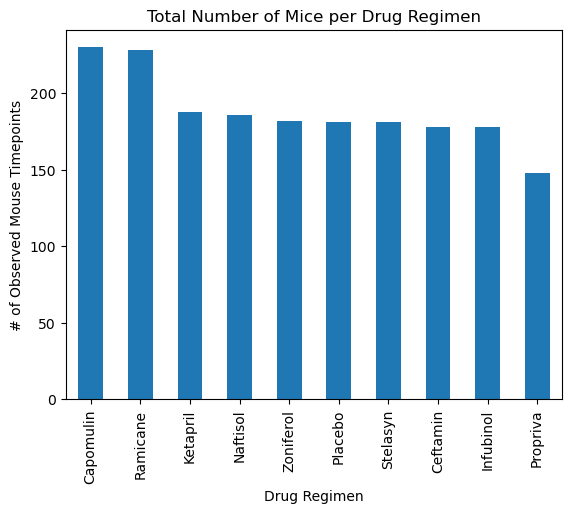

In [34]:
# Make a bar plot showing the data
bar_mice_per_regimen = mice_per_regimen.plot(kind="bar")
# Set the labels
bar_mice_per_regimen.set_title("Total Number of Mice per Drug Regimen")
bar_mice_per_regimen.set_xlabel("Drug Regimen")
bar_mice_per_regimen.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

In [39]:
# Set x axis
x_axis = np.arange(len(mice_per_regimen))
regimen_name = list(mice_per_regimen.index.values)

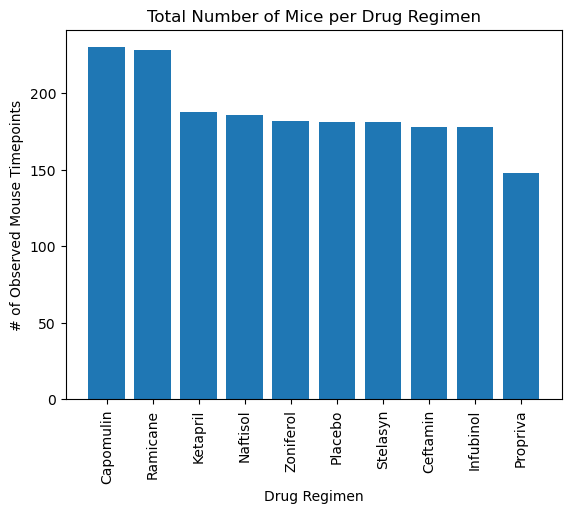

In [43]:
# Create the bar chart
py_bar_mice_per_regimen = plt.bar(x_axis, mice_per_regimen)
# Set labels
plt.xticks(x_axis, regimen_name, rotation="vertical")
plt.title("Total Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

In [48]:
# Calculate mice per sex
sex_of_mice = df_clean.groupby("Sex")["Sex"].count()
sex_of_mice

Sex
Female    922
Male      958
Name: Sex, dtype: int64

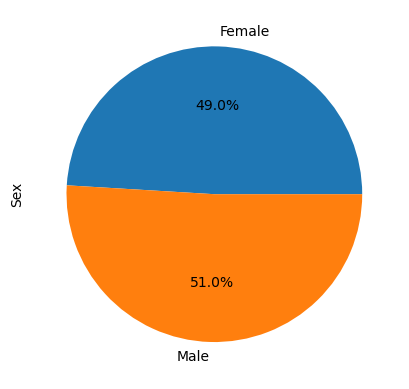

In [50]:
# Create the pie chart using pandas
pie_mice_sex = sex_of_mice.plot(kind="pie", autopct='%1.1f%%')
plt.show()

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

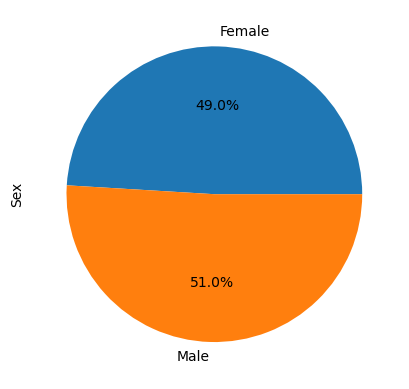

In [53]:
py_pie_mice_sex = plt.pie(sex_of_mice, labels=sex_of_mice.index, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [58]:
# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol = df_clean.groupby(["Drug Regimen", "Mouse ID"]).last()[["Timepoint", "Tumor Volume (mm3)"]]
# reset the index
final_tumor_df = final_tumor_vol.reset_index()

In [ ]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [81]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [82]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []

In [83]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_data_list.append(final_tumor_vol)
    
    # Calculate the IQR
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    # print results
    print(f"{drug} Regimen")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f"Potential outlier final tumor volume(mm3) is {round(outliers[i], 2)}")
    else: print(f"No potential outliers in {drug} group")
    print('----------------------------------')

Capomulin Regimen
No potential outliers in Capomulin group
----------------------------------
Ramicane Regimen
No potential outliers in Ramicane group
----------------------------------
Infubinol Regimen
Potential outlier final tumor volume(mm3) is 36.32
----------------------------------
Ceftamin Regimen
No potential outliers in Ceftamin group
----------------------------------


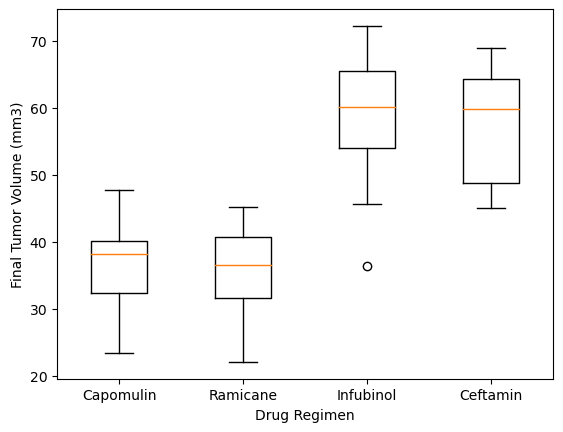

In [88]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(tumor_vol_data_list, labels=regimen)
final_tumor_plot.set_xlabel("Drug Regimen")
final_tumor_plot.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

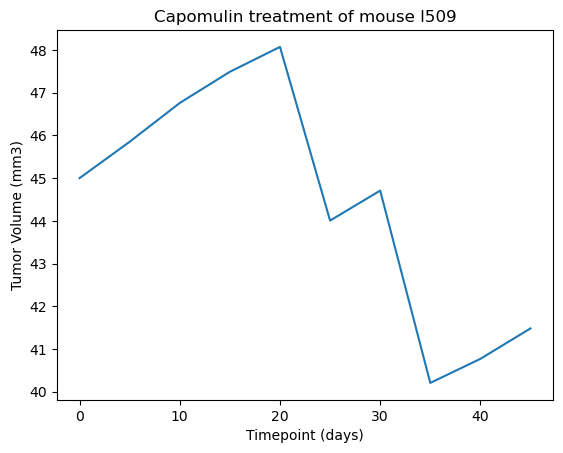

In [91]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# dataframe for only "Capomulin"
capomulin_df = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin"]
# locate specific mouse ID - "l509"
mouse_id = "l509"
mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse_id]
# Generate the plot
time_vs_tumor_vol = plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])
# Labels
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
# show the graph
plt.show()


In [94]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate mean based on Mouse ID
capomulin_group = capomulin_df.groupby("Mouse ID")
weight_avg = capomulin_group["Weight (g)"].mean()
tumor_avg = capomulin_group["Tumor Volume (mm3)"].mean()

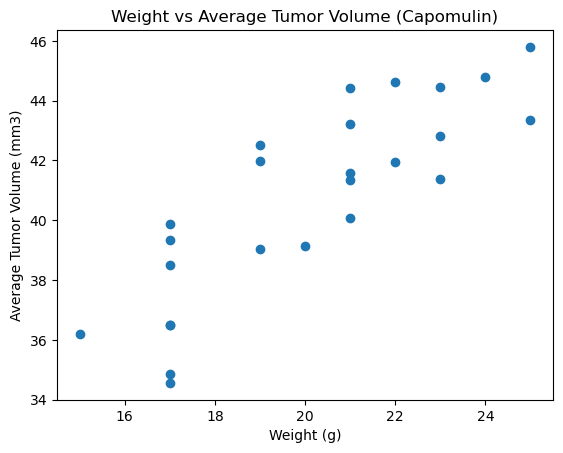

In [95]:
# Generate the plot
plt.scatter(weight_avg, tumor_avg)
# Labels
plt.title("Weight vs Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor vol is 0.84


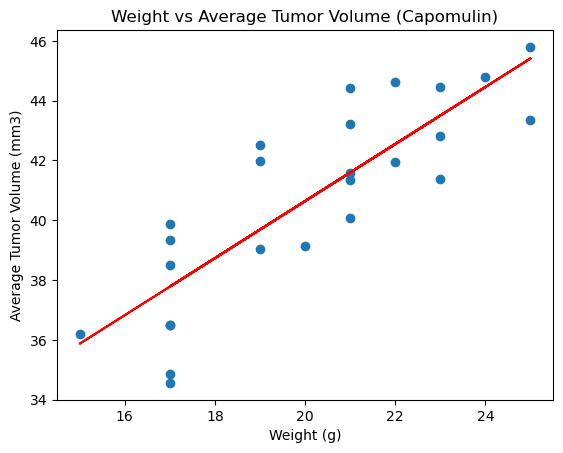

In [98]:
# Calculate the correlation
correlation = round(st.pearsonr(weight_avg, tumor_avg)[0],2)
print(f"The correlation between mouse weight and the average tumor vol is {correlation}")

# Calculate regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_avg, tumor_avg)
regress_values = weight_avg * slope + intercept

# Generate the scatter plot
plt.scatter(weight_avg, tumor_avg)
plt.plot(weight_avg, regress_values, color="red")

# Labels
plt.title("Weight vs Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3)")
plt.show()